# NETFLIX MOVIES AND TV SHOWS

In [2]:
#loading importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import os
import warnings
warnings.filterwarnings("ignore")

In [4]:
df= pd.read_csv("netflix_titles.csv")

# DISPLAY THE TOP 5 COLUMNS USING HEAD

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# DISPLAYING THE ROWS AND COLUMNS USING SHAPE

In [18]:
df.shape

(7787, 12)

In [20]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [22]:
df.isnull().sum()/(len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [24]:
director=df.dropna(axis=1)

In [26]:
df.date_added.fillna("unknown",inplace= True)

In [28]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added         0
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# USING ANONYMOUS FUNCTION : LAMBDA

In [31]:
df["year"]= df.date_added.apply(lambda x: str(x).split(",")[-1])

In [33]:
df.year.value_counts()    

year
 2019      2153
 2020      2009
 2018      1685
 2017      1225
 2016       443
 2021       117
 2015        88
 2014        25
 2011        13
 2013        11
unknown      10
 2012         3
 2008         2
 2009         2
 2010         1
Name: count, dtype: int64

In [35]:
df["year"]= df.year.apply(lambda x: str(x).replace("unknown","2019"))

In [37]:
df["year"]= df.year.apply(lambda x: str(x).replace(" ",""))

In [39]:
df.year.value_counts()

year
2019    2163
2020    2009
2018    1685
2017    1225
2016     443
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: count, dtype: int64

In [41]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added         0
release_year       0
rating             7
duration           0
listed_in          0
description        0
year               0
dtype: int64

In [43]:
df.country.value_counts()

country
United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 681, dtype: int64

In [45]:
df.country.fillna("United_states",inplace= True)

In [47]:
df.rating.value_counts()

rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

In [49]:
df.rating.fillna("TV-MA",inplace= True)

In [51]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
year               0
dtype: int64

# PLOTTING THE VALUES WITH USE OF SEABORN AND MATPLOTLIB

Text(0, 0.5, 'Number of country')

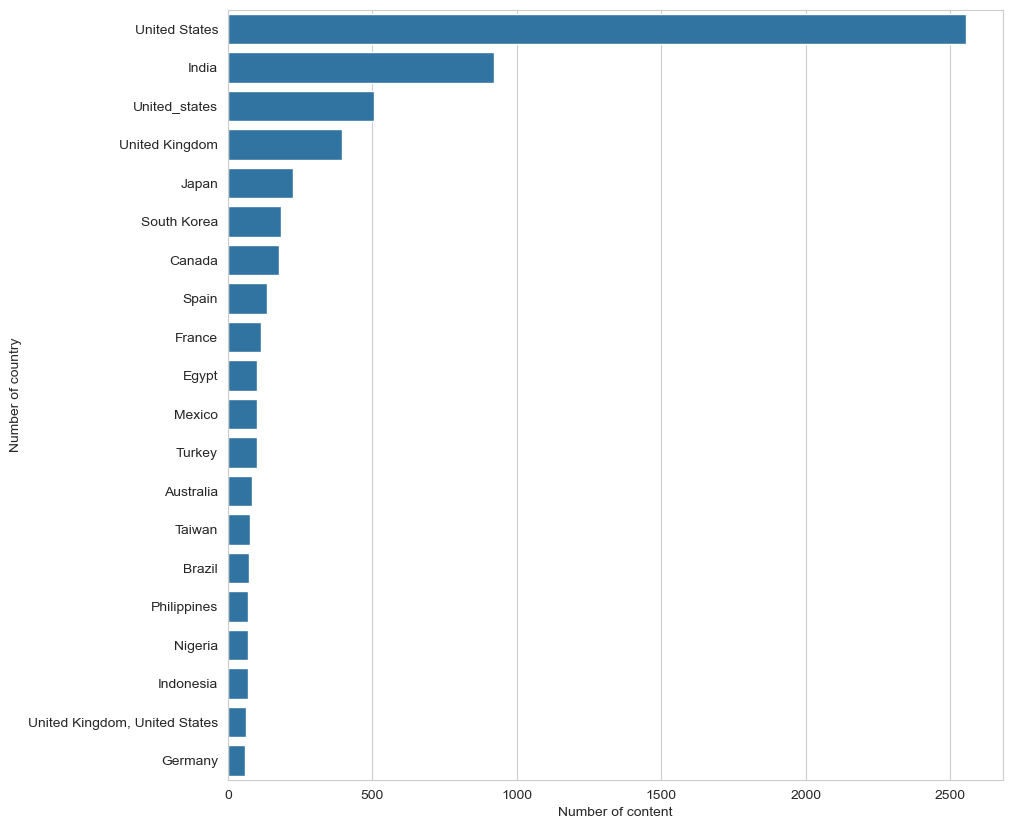

In [64]:
x= df.country.value_counts().head(20)
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")   #set style to whitegrid
ax= sns.barplot(x=x.values,y=x.index)   #using bar for visualization
ax.set_xlabel("Number of content")
ax.set_ylabel("Number of country")


<Axes: xlabel='type', ylabel='count'>

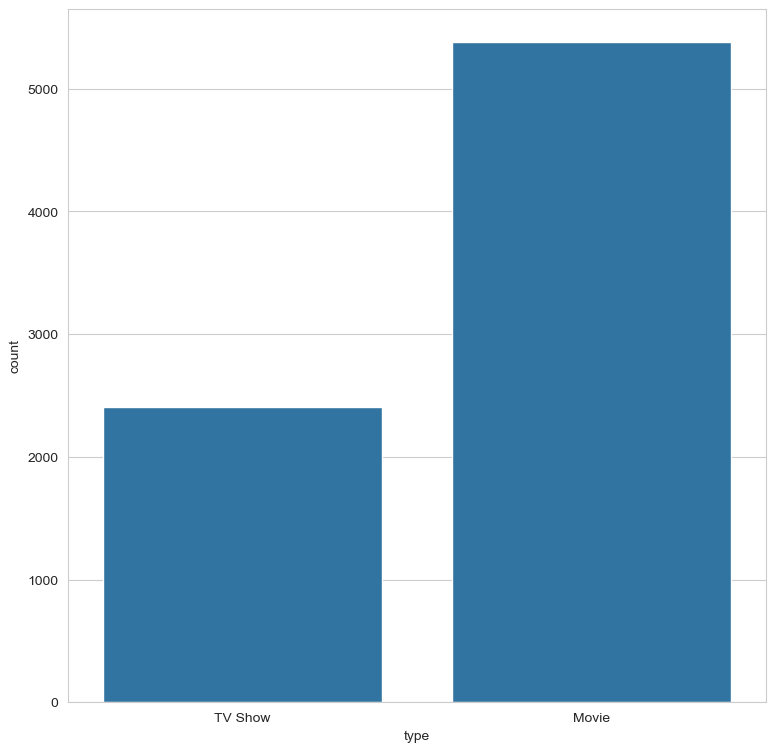

In [66]:
plt.figure(figsize=(9,9))

x= df.type.value_counts()
sns.countplot(x= "type",data= df)

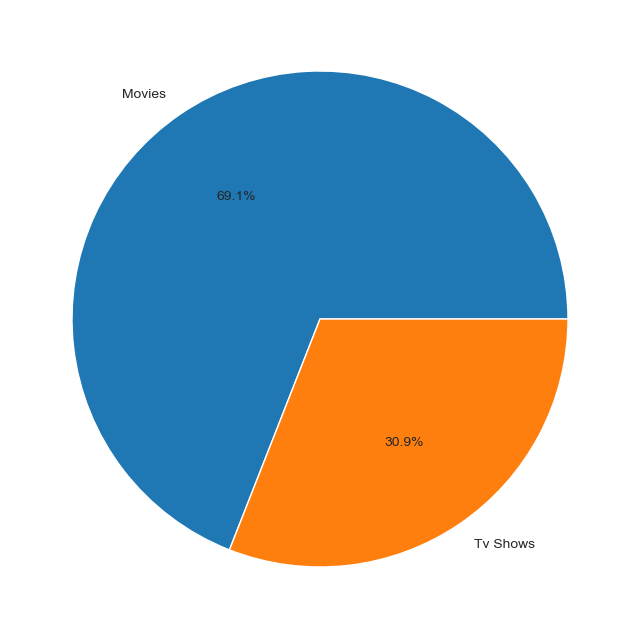

In [68]:
plt.figure(figsize=(8,10))

label= ["Movies","Tv Shows"]

plt.pie(x.values, labels= label ,autopct= "%1.1f%%") # visualizing using pie
plt.show()

<Axes: xlabel='Year'>

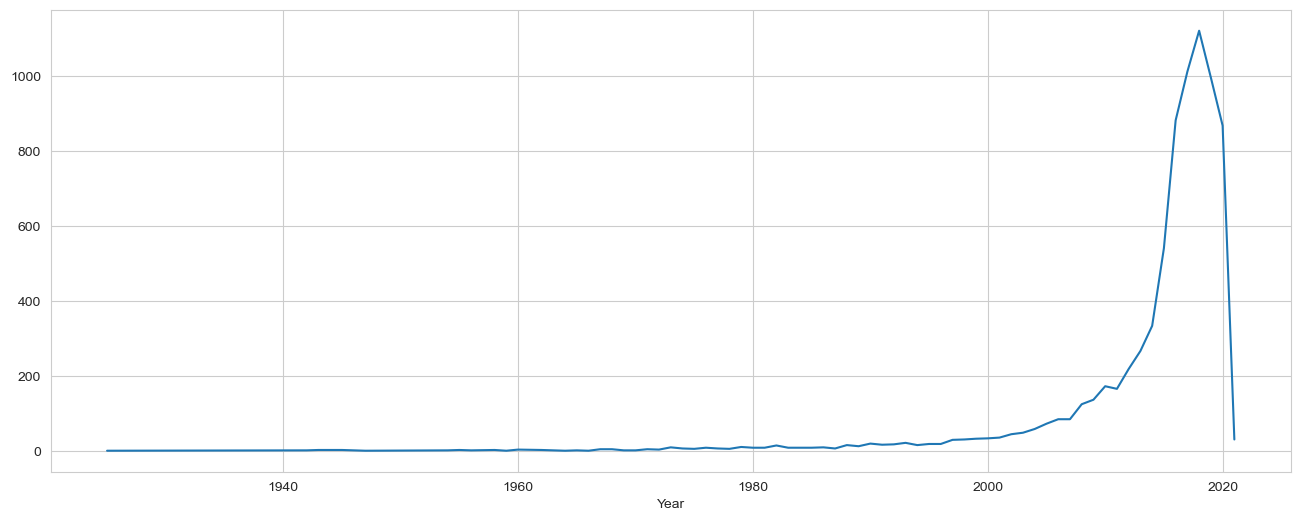

In [70]:
x= df.release_year.value_counts()
plt.figure(figsize=(16,6))
plt.xlabel("Year")

sns.lineplot(x=x.index ,y= x.values)

Text(0, 0.5, 'No of content')

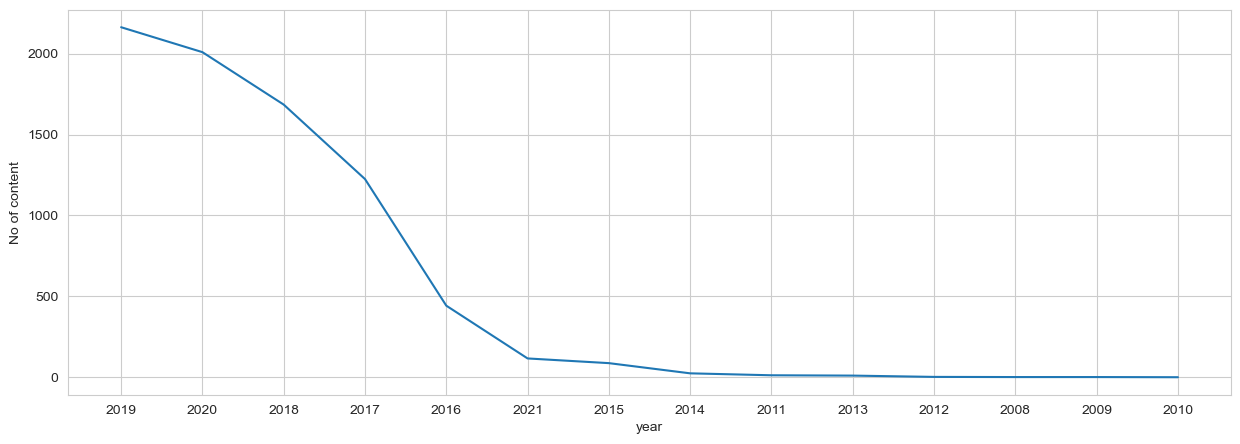

In [74]:
plt.figure(figsize=(15,5))
x= df.year.value_counts()
ax= sns.lineplot(x=x.index,y=x.values)
ax.set_ylabel("No of content")

<Axes: ylabel='year'>

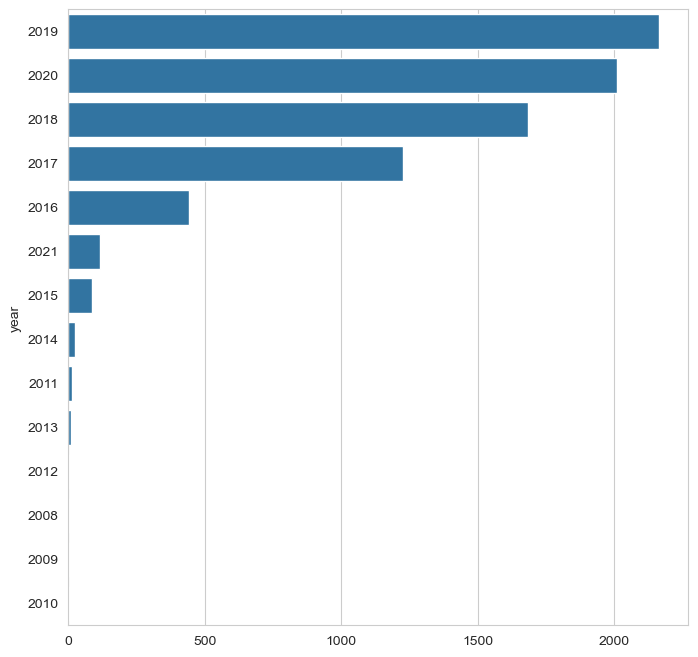

In [78]:
plt.figure(figsize=(8,8))

sns.barplot(x=x.values,y=x.index)

<Axes: xlabel='rating', ylabel='count'>

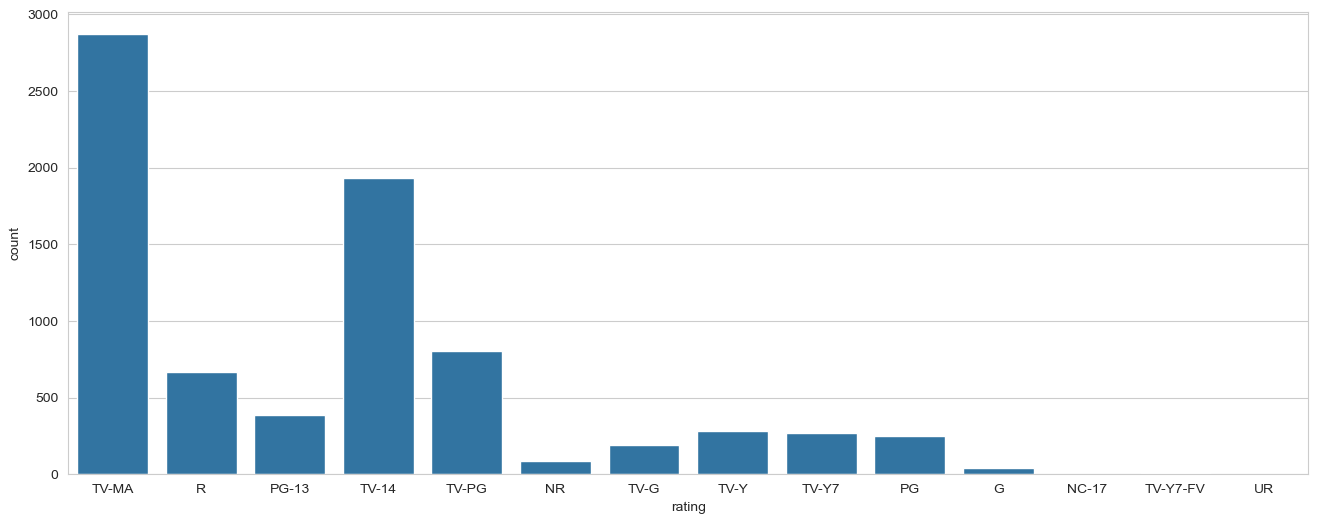

In [80]:
plt.figure(figsize=(16,6))
sns.countplot(x= "rating",data= df)

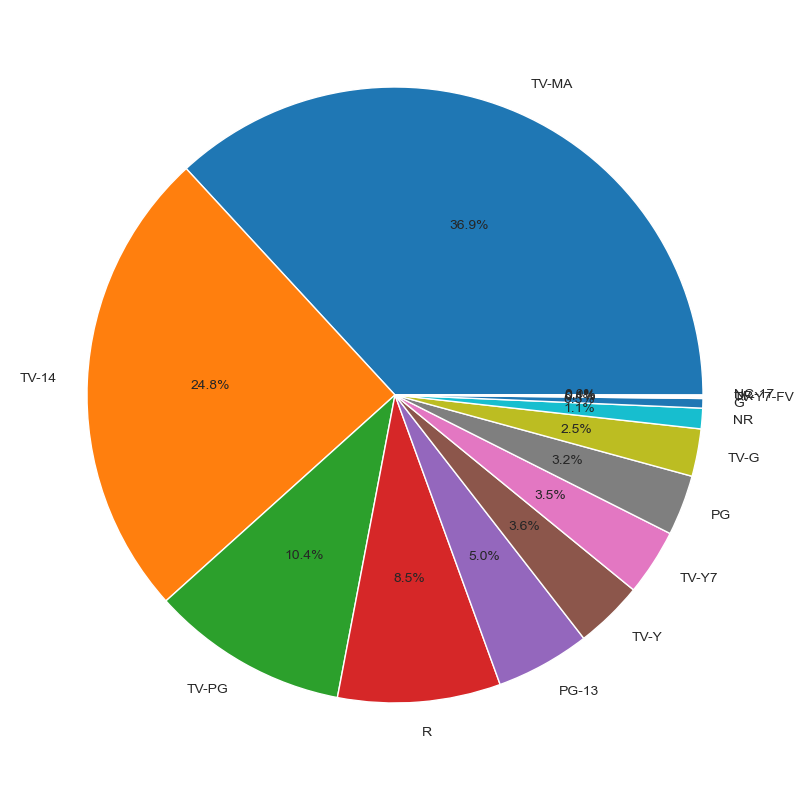

In [82]:
x= df.rating.value_counts()
plt.figure(figsize=(10,10))

labels= list(x.index)
plt.pie(x.values,labels= labels,autopct= "%1.1f%%")
plt.show()